<a href="https://colab.research.google.com/github/wooridle/mlp_lecture/blob/main/2.multivariable_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
torch.manual_seed(1)

### 독립변수 : 3개의 퀴즈 점수로부터 
### target : 최종 점수를 예측하는 모델

### Train 데이터

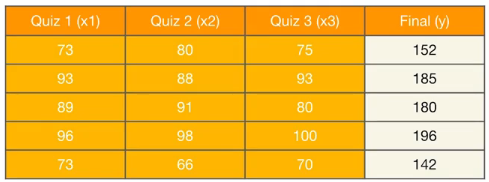

In [ ]:
# 훈련 데이터
x1_train = torch.FloatTensor([[73], [93], [89], [96], [73]])
x2_train = torch.FloatTensor([[80], [88], [91], [98], [66]])
x3_train = torch.FloatTensor([[75], [93], [90], [100], [70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

#### 가중치 w와 편향 b 초기화

w1 = torch.zeros(1, requires_grad=True)

w2 = torch.zeros(1, requires_grad=True)

w3 = torch.zeros(1, requires_grad=True)

b = torch.zeros(1, requires_grad=True)


#### optimizer 설정

optimizer = optim.SGD([w1, w2, w3, b], lr=1e-5)

nb_epochs = 1000

for epoch in range(nb_epochs + 1):

    # H(x) 계산

    hypothesis = x1_train * w1 + x2_train * w2 + x3_train * w3 + b

    # cost 계산

    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} w1: {:.3f} w2: {:.3f} w3: {:.3f} b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, w1.item(), w2.item(), w3.item(), b.item(), cost.item()
        ))

### 행렬 연산을 고려하여 파이토치로 구현하기

In [ ]:
x_train  =  torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  80], 
                               [96,  98,  100],   
                               [73,  66,  70]])  
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

In [ ]:
print(x_train.shape)
print(y_train.shape)

torch.Size([5, 3])
torch.Size([5, 1])


#### 가중치와 편향 선언

W = torch.zeros((3, 1), requires_grad=True)

b = torch.zeros(1, requires_grad=True)

hypothesis = x_train.matmul(W) + b

#### optimizer 설정

optimizer = optim.SGD([W, b], lr=1e-5)

nb_epochs = 20

for epoch in range(nb_epochs + 1):

    # H(x) 계산

    # 편향 b는 브로드 캐스팅되어 각 샘플에 더해집니다.

    hypothesis = x_train.matmul(W) + b


    # cost 계산

    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선

    optimizer.zero_grad()

    cost.backward()
    
    optimizer.step()

    print('Epoch {:4d}/{} hypothesis: {} Cost: {:.6f}'.format(
        epoch, nb_epochs, hypothesis.squeeze().detach(), cost.item()
    ))

Epoch    0/20 hypothesis: tensor([0., 0., 0., 0., 0.]) Cost: 29661.800781
Epoch    1/20 hypothesis: tensor([66.7178, 80.1701, 76.1025, 86.0194, 61.1565]) Cost: 9537.694336
Epoch    2/20 hypothesis: tensor([104.5421, 125.6208, 119.2478, 134.7862,  95.8280]) Cost: 3069.590088
Epoch    3/20 hypothesis: tensor([125.9858, 151.3882, 143.7087, 162.4333, 115.4844]) Cost: 990.670288
Epoch    4/20 hypothesis: tensor([138.1429, 165.9963, 157.5768, 178.1071, 126.6283]) Cost: 322.481873
Epoch    5/20 hypothesis: tensor([145.0350, 174.2780, 165.4395, 186.9928, 132.9461]) Cost: 107.717064
Epoch    6/20 hypothesis: tensor([148.9423, 178.9730, 169.8976, 192.0301, 136.5279]) Cost: 38.687496
Epoch    7/20 hypothesis: tensor([151.1574, 181.6346, 172.4254, 194.8856, 138.5585]) Cost: 16.499043
Epoch    8/20 hypothesis: tensor([152.4131, 183.1435, 173.8590, 196.5043, 139.7097]) Cost: 9.365656
Epoch    9/20 hypothesis: tensor([153.1250, 183.9988, 174.6723, 197.4217, 140.3625]) Cost: 7.071114
Epoch   10/20 hyp